Lets explore the employee data

In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('employee_data.csv')

In [4]:
df.shape

(14249, 10)

In [5]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [6]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


## numerical features

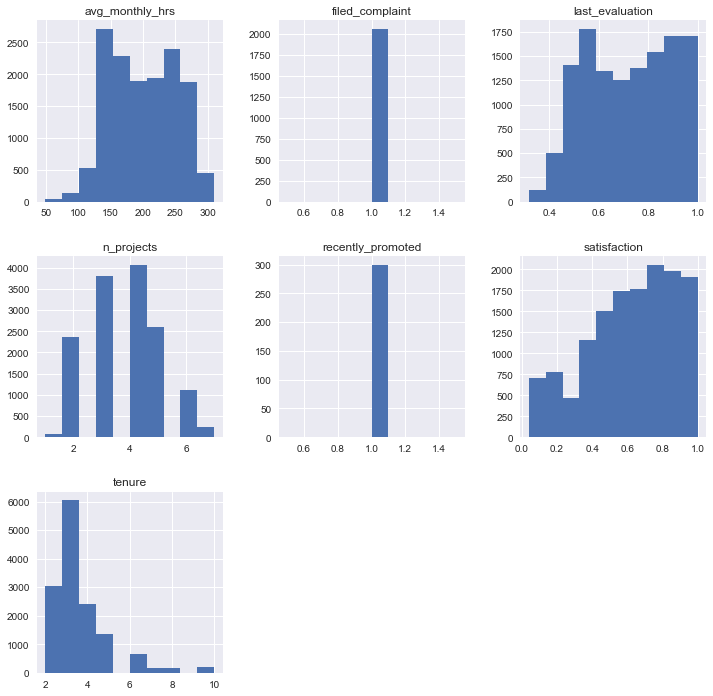

In [7]:
df.hist(figsize=(12,12))
plt.show()

In [8]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


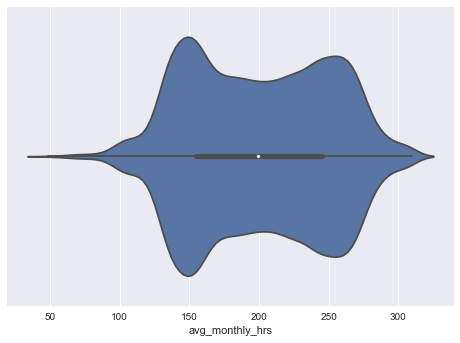

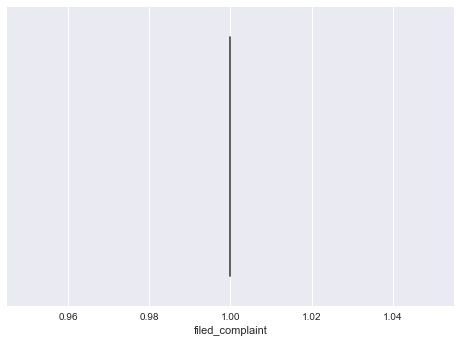

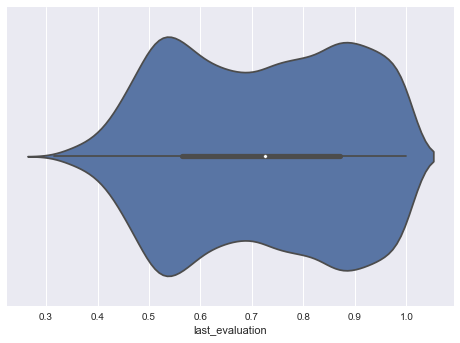

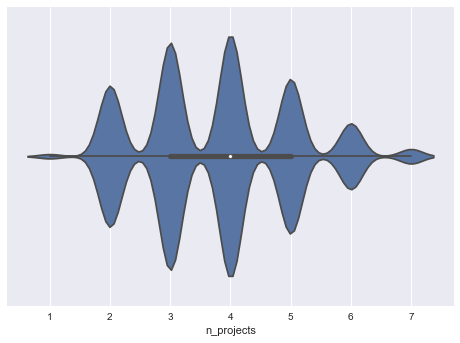

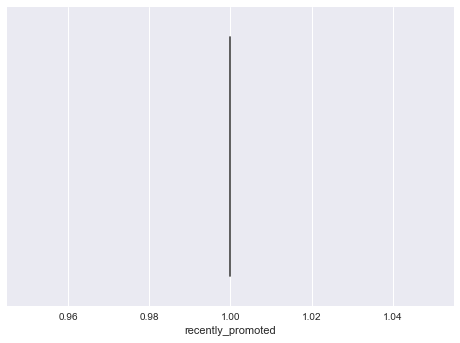

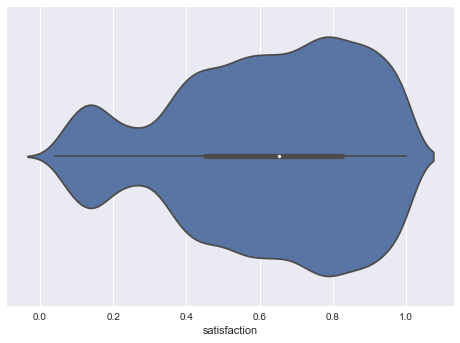

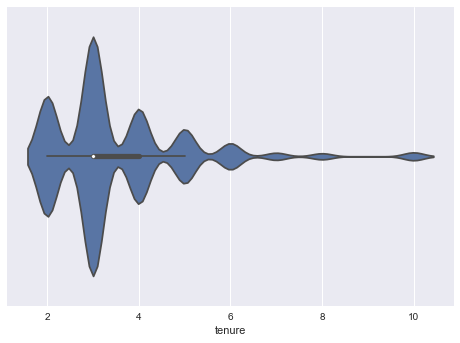

In [9]:
for i in df.dtypes[df.dtypes!='object'].index:
    sns.violinplot(df[i])
    plt.show()

## categorical features

In [12]:
df.describe(include=["object"])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


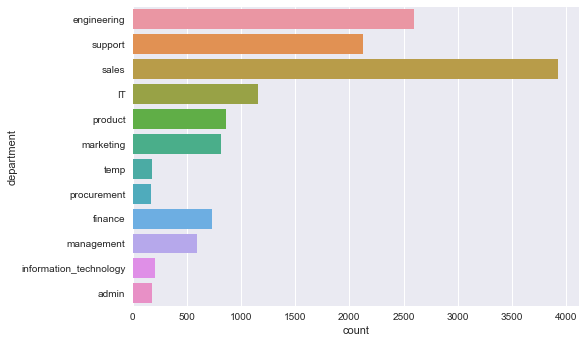

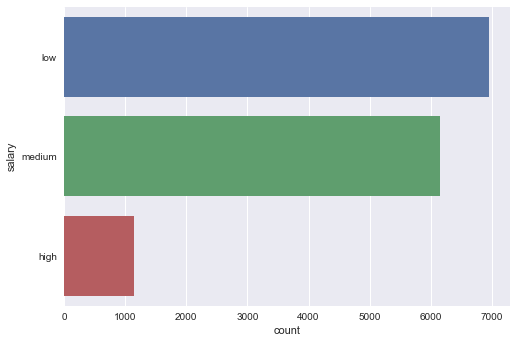

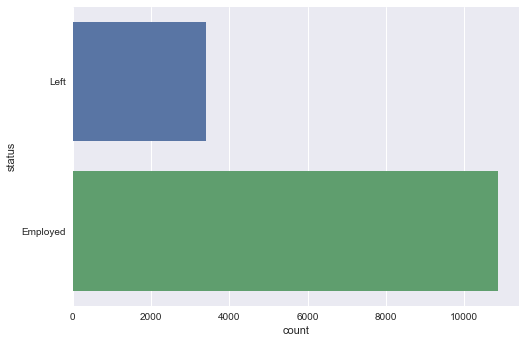

In [15]:
for i in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(y=i,data=df)
    plt.show()

## segmentations

In [16]:
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


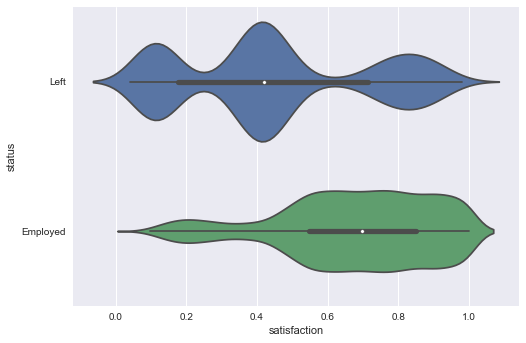

In [17]:
sns.violinplot(x='satisfaction', y='status', data=df)

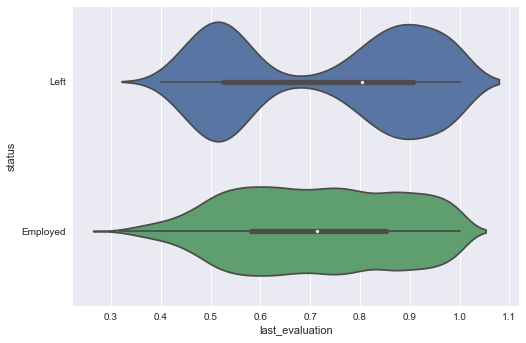

In [18]:
sns.violinplot(x='last_evaluation', y='status', data=df)

### bivariate segmentation

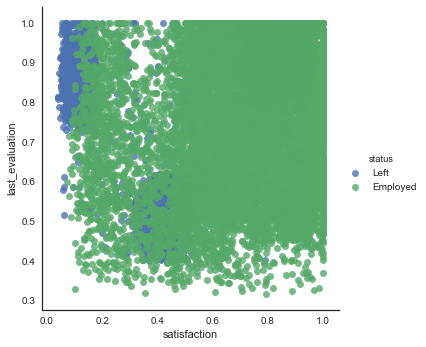

In [21]:
sns.lmplot(x='satisfaction', y='last_evaluation', hue='status', data=df, fit_reg=False)

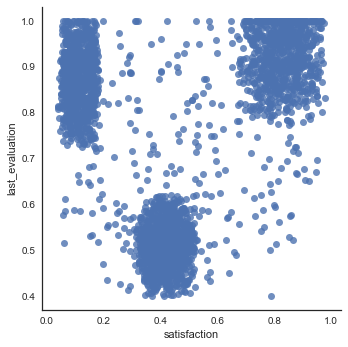

In [22]:
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status=='Left'], fit_reg=False)

This gives us 3 categories for employees who left

"Underperformers: for last_evaluation < 0.6

"Unhappy" for satisfaction_level < 0.2

"Overachievers" last_evaluation > 0.8 and satisfaction > 0.7